In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Carga de datos
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHU9r-osSfdm1EQ1qT4SqM13kdFN5ELQStnSx-n4jOzSr4jxrg-YMG4bCe9W5Kkw1qelHxSKrfZlMi/pub?gid=1834913949&single=true&output=csv')



# Columnas del archivo "train.csv"


In [ ]:
# nombres de las columnas
column_names = data.columns

print(column_names)


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [ ]:
# información general sobre los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   object 
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

# Visualización de algunas columnas


## Generos

In [ ]:
# columna "genres"
first_values_genres = data['genres'].head(10)
print(first_values_genres)


0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5    [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                  [{'id': 99, 'name': 'Documentary'}]
8    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
Name: genres, dtype: object


## Visualización de generos vs dinero recaudado

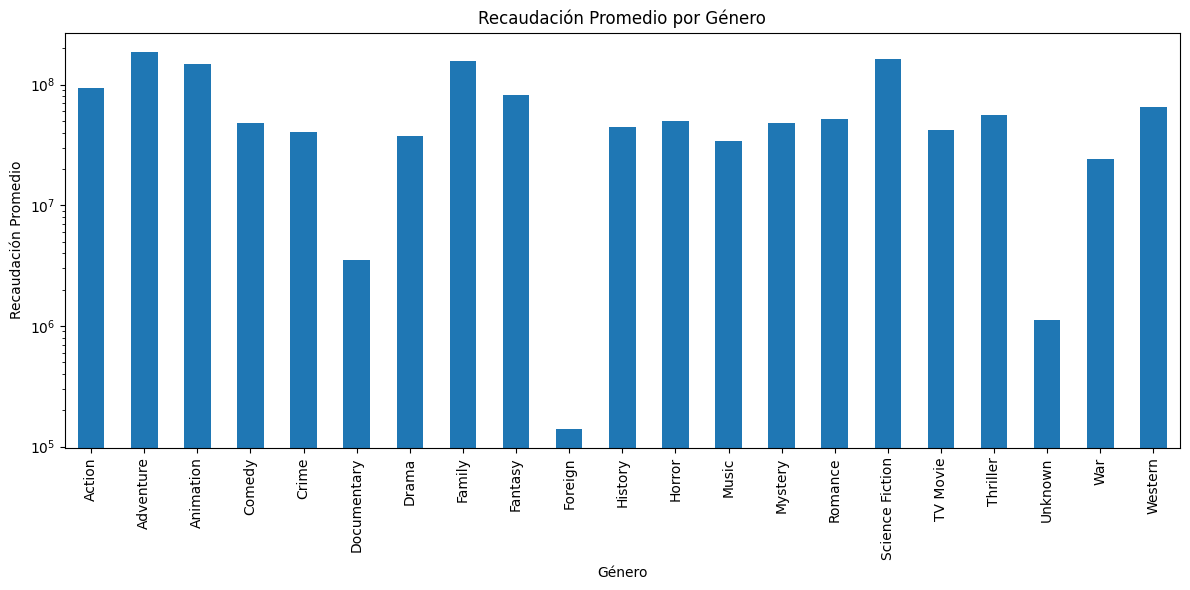

In [ ]:
# listas vacías
genres_list = []
revenue_list = []

# Recorrer 'genres'
for genre_data in data['genres']:
    # extraer los nombres de género
    def extract_genre_name(genre_data):
        try:
            genre_dict = eval(genre_data)  # Evaluar la cadena como un diccionario
            genre_name = genre_dict[0]['name']  # Extraer el nombre del género
            return genre_name
        except:
            return None

    genre_name = extract_genre_name(genre_data)
    if genre_name is not None:
        genres_list.append(genre_name)
    else:
        genres_list.append('Unknown') # en caso de no poder extraer el genero

# Llenar la lista de recaudaciones
revenue_list = data['revenue']

# Crear un DataFrame con géneros y recaudaciones
genre_revenue_df = pd.DataFrame({'Genre': genres_list, 'Revenue': revenue_list})

# Calcular el promedio de recaudación por género
average_revenue_by_genre = genre_revenue_df.groupby('Genre')['Revenue'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_revenue_by_genre.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Recaudación Promedio')
plt.title('Recaudación Promedio por Género')
plt.yscale('log')  # Escala logarítmica para la recaudación
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Presupuesto

In [ ]:
# columna "budget"
first_values_budget = data['budget'].head(10)
print(first_values_budget)


0    14000000
1    40000000
2     3300000
3     1200000
4           0
5     8000000
6    14000000
7           0
8           0
9     6000000
Name: budget, dtype: int64


Nota: Como se puede observar, la columna presupuesto NO está completa, podría suponerse que no es la unica con este problema (LIMPIEZA DE DATOS)

## Visualización de presupuesto vs dinero recaudado

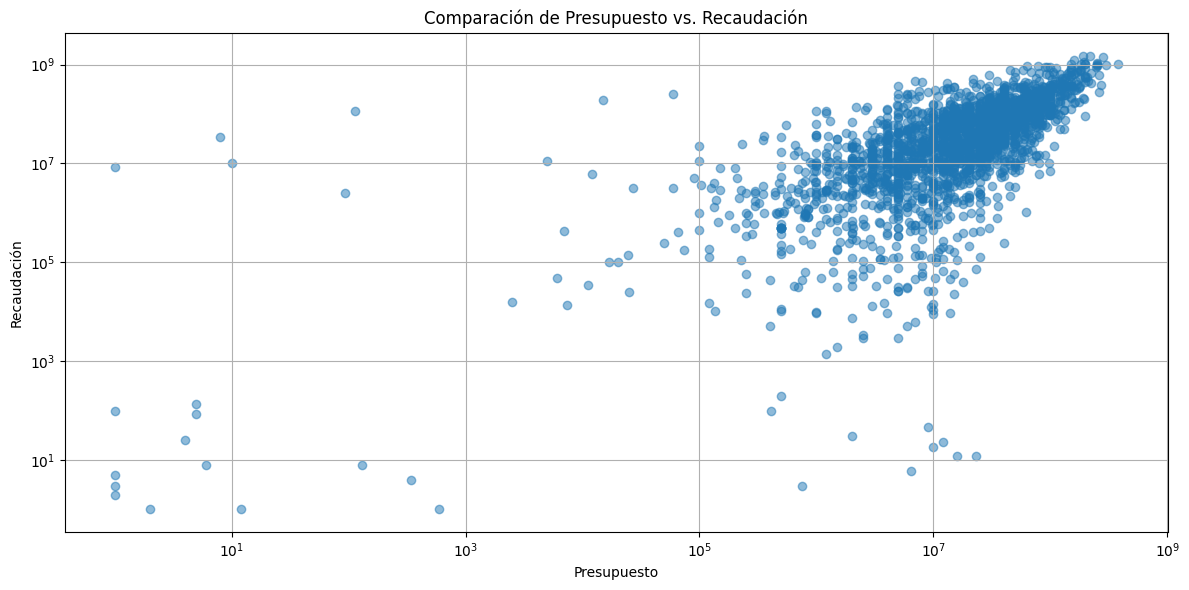

In [ ]:
# Seleccion de columnas
budget_revenue_data = data[['budget', 'revenue']]

# Crear un grafico
plt.figure(figsize=(12, 6))
plt.scatter(budget_revenue_data['budget'], budget_revenue_data['revenue'], alpha=0.5)
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.title('Comparación de Presupuesto vs. Recaudación')
plt.xscale('log')  # Escala logarítmica para el presupuesto
plt.yscale('log')  # Escala logarítmica para la recaudación
plt.grid(True)
plt.tight_layout()

plt.show()

##Popularidad

In [ ]:
# columna "popularity"
first_values_popularity = data['popularity'].head(10)
print(first_values_popularity)

0    6.575.393
1    8.248.895
2    6.429.999
3    3.174.936
4      114.807
5      743.274
6    7.286.477
7    1.949.044
8    6.902.423
9    4.672.036
Name: popularity, dtype: object


## Visualización de popularidad vs dinero recaudado

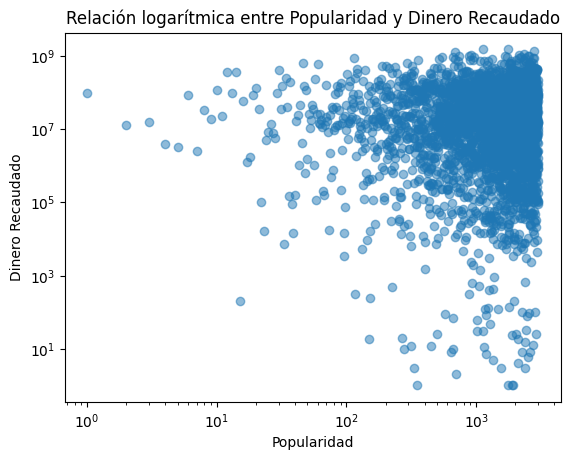

In [ ]:
# Crear gráfico de dispersión
plt.scatter(data['popularity'], data['revenue'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Relación logarítmica entre Popularidad y Dinero Recaudado')
plt.xlabel('Popularidad')
plt.ylabel('Dinero Recaudado')
plt.show()


## Casting

In [ ]:
cast_column = data['cast']
first_values_casting = cast_column.head(10)

print(first_values_casting)

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
5    [{'cast_id': 6, 'character': 'Pinocchio (voice...
6    [{'cast_id': 23, 'character': 'Clyde', 'credit...
7    [{'cast_id': 2, 'character': 'Himself', 'credi...
8    [{'cast_id': 1, 'character': 'Long John Silver...
9    [{'cast_id': 24, 'character': 'Jonathan Steinb...
Name: cast, dtype: object


## Entre los actores mas famosos se encuentran:
('Tom Hanks', 'Meryl Streep', 'Leonardo DiCaprio', 'Jennifer Lawrence', 'Denzel Washington', 'Cate Blanchett', 'Robert De Niro', 'Julia Roberts', 'Brad Pitt', 'Charlize Theron', 'Keanu Reeves', 'Chris Hemsworth', 'Johnny Depp','Dwayne Johnson')

**con lo cual**:

In [ ]:
# Lista de actores
actores_famosos = ['Tom Hanks', 'Meryl Streep', 'Leonardo DiCaprio', 'Jennifer Lawrence', 'Denzel Washington', 'Cate Blanchett', 'Robert De Niro', 'Julia Roberts', 'Brad Pitt', 'Charlize Theron', 'Keanu Reeves', 'Chris Hemsworth', 'Johnny Depp', 'Dwayne Johnson']

data['cast'] = data['cast'].fillna('')  # cambiar valores nulos con una cadena vacía

# Filtrar películas que contienen al menos uno de los actores famosos
peliculas_con_actores_famosos = data[data['cast'].apply(lambda cast: any(actor in cast for actor in actores_famosos))]


## Visualización de casting vs dinero recaudado

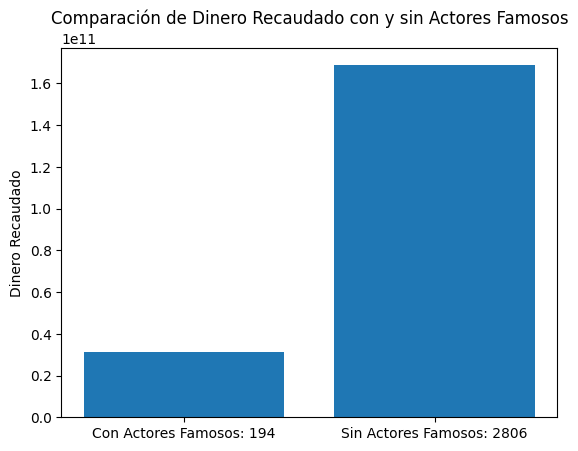

In [ ]:
# Tratar valores nulos en la columna 'revenue'
data['revenue'] = data['revenue'].fillna(0)  # Rellena los valores nulos con 0

# Filtrar películas que NO contienen a los actores famosos
peliculas_sin_actores_famosos = data[~data['cast'].apply(lambda cast: any(actor in cast for actor in actores_famosos))]

# Calcular el dinero recaudado por cada grupo
recaudado_con_actores = peliculas_con_actores_famosos['revenue'].sum()
recaudado_sin_actores = peliculas_sin_actores_famosos['revenue'].sum()

# Obtener la cantidad de películas en cada lista
cantidad_peliculas_con_actores = len(peliculas_con_actores_famosos)
cantidad_peliculas_sin_actores = len(peliculas_sin_actores_famosos)


# Crear un gráfico de barras
fig, ax = plt.subplots()
ax.bar([f'Con Actores Famosos: {cantidad_peliculas_con_actores}', f'Sin Actores Famosos: {cantidad_peliculas_sin_actores}'], [recaudado_con_actores, recaudado_sin_actores])
ax.set_ylabel('Dinero Recaudado')
ax.set_title('Comparación de Dinero Recaudado con y sin Actores Famosos')

# Mostrar el gráfico
plt.show()


Se nota gran diferencia en el numero de peliculas con estos actores y sin estos

Película con actores famosos que más dinero recaudó:
title      The Avengers
revenue      1519557910
Name: 1126, dtype: object

Película sin actores famosos que más dinero recaudó:
title      Beauty and the Beast
revenue              1262886337
Name: 684, dtype: object


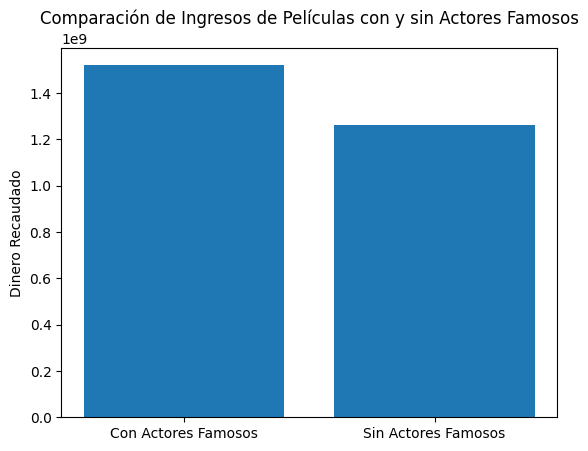

In [ ]:
# La película con actores famosos que más dinero recaudó
pelicula_con_actores_mas_ingresos = peliculas_con_actores_famosos.loc[peliculas_con_actores_famosos['revenue'].idxmax()]

# La película sin actores famosos que más dinero recaudó
pelicula_sin_actores_mas_ingresos = peliculas_sin_actores_famosos.loc[peliculas_sin_actores_famosos['revenue'].idxmax()]

# información sobre las películas con mayores ingresos
print("Película con actores famosos que más dinero recaudó:")
print(pelicula_con_actores_mas_ingresos[['title', 'revenue']])

print("\nPelícula sin actores famosos que más dinero recaudó:")
print(pelicula_sin_actores_mas_ingresos[['title', 'revenue']])

# Crear un gráfico de barras comparando los ingresos
fig, ax = plt.subplots()
ax.bar(['Con Actores Famosos', 'Sin Actores Famosos'], [pelicula_con_actores_mas_ingresos['revenue'], pelicula_sin_actores_mas_ingresos['revenue']])
ax.set_ylabel('Dinero Recaudado')
ax.set_title('Comparación de Ingresos de Películas con y sin Actores Famosos')

# Mostrar el gráfico
plt.show()

Parece ser que el casting no es un factor tan influyente con respecto a la recaudación de dinero, sobre todo comparado con el presupuesto y la popularidad de la película; no se nota mucha diferencia(relativamente) entre el dinero recaudado por The Avengers y Beauty and the Beast, esto podría deberse, quizás, a que Beauty and the Beast fue producida por Walt Disney Pictures, una compañia muy potente en el medio.

## Empresa de producción

In [ ]:
# columna 'production_companies'
first_values_companies = data['production_companies'].head(10)

# Imprimir los resultados
print(first_values_companies)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                     
4                                                     
5                                                     
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                     
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object


##Visualización de empresa vs dinero recaudado

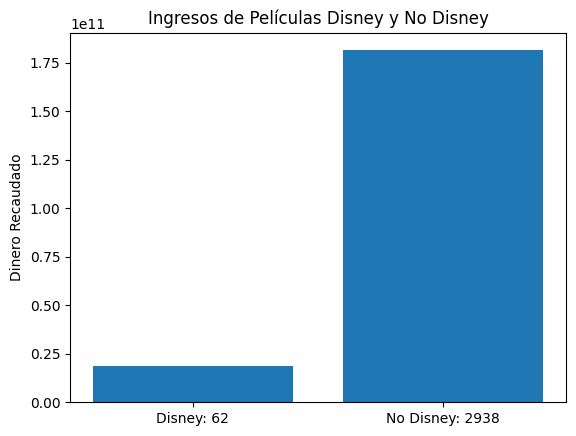

In [ ]:
# Limpiar datos de la columna 'production_companies'
data['production_companies'] = data['production_companies'].fillna('')

# Lista de películas producidas por 'Walt Disney Pictures'
peliculas_disney = data[data['production_companies'].str.contains('Walt Disney Pictures')]

# Lista de películas no producidas por 'Walt Disney Pictures'
peliculas_no_disney = data[~data['production_companies'].str.contains('Walt Disney Pictures')]

# Cantidad de películas en cada lista
cantidad_peliculas_disney = len(peliculas_disney)
cantidad_peliculas_no_disney = len(peliculas_no_disney)

# Comparar el dinero recaudado por las dos listas en un gráfico
fig, ax = plt.subplots()
ax.bar([f'Disney: {cantidad_peliculas_disney}', f'No Disney: {cantidad_peliculas_no_disney}'], [peliculas_disney['revenue'].sum(), peliculas_no_disney['revenue'].sum()])
ax.set_ylabel('Dinero Recaudado')
ax.set_title('Ingresos de Películas Disney y No Disney')

# Mostrar el gráfico
plt.show()


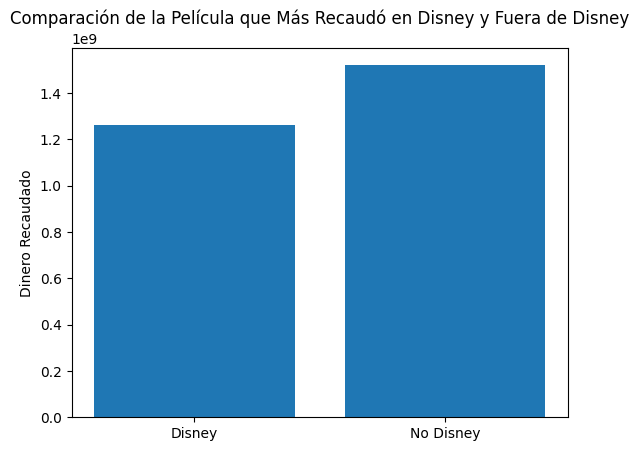

Película más recaudada de Disney:
title      Beauty and the Beast
revenue              1262886337
Name: 684, dtype: object

Película más recaudada fuera de Disney:
title      The Avengers
revenue      1519557910
Name: 1126, dtype: object


In [ ]:
# Obtener la película de Disney que más recaudó
pelicula_mas_recaudada_disney = peliculas_disney.loc[peliculas_disney['revenue'].idxmax()]

# Obtener la película fuera de Disney que más recaudó
pelicula_mas_recaudada_no_disney = peliculas_no_disney.loc[peliculas_no_disney['revenue'].idxmax()]

# Comparar el dinero recaudado por ambas películas en un gráfico
fig, ax = plt.subplots()
ax.bar(['Disney', 'No Disney'], [pelicula_mas_recaudada_disney['revenue'], pelicula_mas_recaudada_no_disney['revenue']])
ax.set_ylabel('Dinero Recaudado')
ax.set_title('Comparación de la Película que Más Recaudó en Disney y Fuera de Disney')

plt.show()

# Información sobre las películas
print("Película más recaudada de Disney:")
print(pelicula_mas_recaudada_disney[['title', 'revenue']])

print("\nPelícula más recaudada fuera de Disney:")
print(pelicula_mas_recaudada_no_disney[['title', 'revenue']])

## Duración

In [ ]:
# columna 'runtime'
first_values_runtime = data['runtime'].head(10)

# Imprimir los resultados
print(first_values_runtime)

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
5     83.0
6     92.0
7     84.0
8    100.0
9     91.0
Name: runtime, dtype: float64


##Visualización de duración vs dinero recaudado

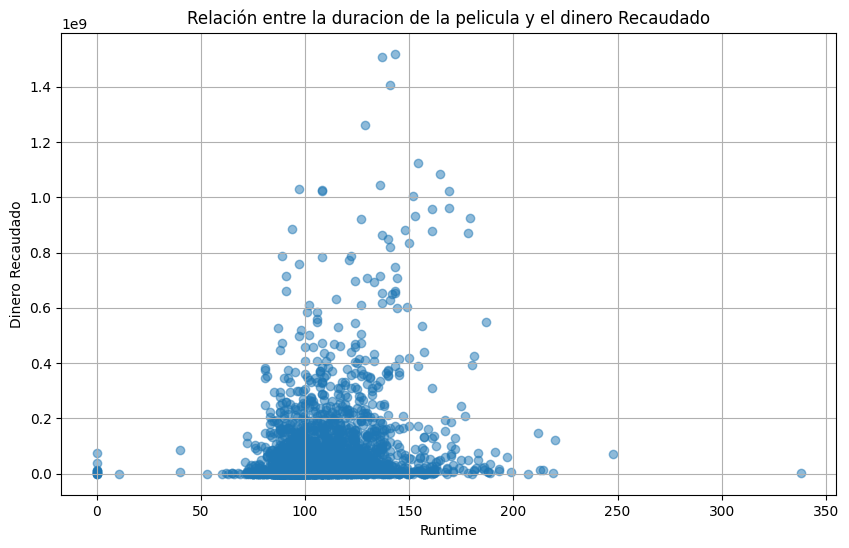

In [ ]:
# Columnas
columnas_interes = ['runtime', 'revenue']
datos_interes = data[columnas_interes]

# Limpiar valores nulos
datos_interes = datos_interes.dropna()

# gráfico
plt.figure(figsize=(10, 6))
plt.scatter(datos_interes['runtime'], datos_interes['revenue'], alpha=0.5)
plt.title('Relación entre la duracion de la pelicula y el dinero Recaudado')
plt.xlabel('Runtime')
plt.ylabel('Dinero Recaudado')
plt.grid(True)
plt.show()

## Conclusiones

Se puede notar que los factores más influyentes en el "éxito" de una película son la popularidad y el presupuesto, a partir de ahí factores como el género, el casting e incluso la productora encargada de las películas tienen un peso secundario, puesto que películas con o sin determinados actores recaudan un valor "similar" de dinero, y películas producidas por tal o cual productora recaudan un valor "similar" de dinero.